In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("../csv/Sales Records.csv", usecols=[0,1,3,8,9,10])

컬럼의 이름을 권역, 국가, 판매채널, 판매개수, 단가, 원가
총단가, 총원가, 총이윤이라는 파생변수
권역별 총이윤의 평균 그래프로 표(바그래프)
국가별 판매채널에 따른 총이윤의 합계를 그래프로 표시(바그래프)

In [3]:
df.columns =['권역','국가','판매채널','판매개수','단가','원가']

In [4]:
df.head(1)

,권역,국가,판매채널,판매개수,단가,원가
0,Sub-Saharan Africa,Chad,Online,4484,651.21,524.96


In [5]:
df['총단가'] = df['판매개수'] * df['단가']
df['총원가'] = df['판매개수'] * df['원가']
df['총이윤'] = df['총단가'] - df['총원가']

In [6]:
df.describe()

,판매개수,단가,원가,총단가,총원가,총이윤
count,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04
mean,5002.855900,268.143139,188.806639,1.333355e+06,9.382658e+05,3.950893e+05
std,2873.246454,217.944092,176.445907,1.465026e+06,1.145914e+06,3.775550e+05
min,2.000000,9.330000,6.920000,1.679400e+02,1.245600e+02,4.338000e+01
25%,2530.750000,109.280000,56.670000,2.885511e+05,1.647855e+05,9.832914e+04
50%,4962.000000,205.700000,117.110000,8.000512e+05,4.816058e+05,2.890990e+05
75%,7472.000000,437.200000,364.690000,1.819143e+06,1.183822e+06,5.664227e+05
max,10000.000000,668.270000,524.960000,6.680027e+06,5.241726e+06,1.738178e+06


In [7]:
df = df.rename(columns={'권역':'대륙'})

<Axes: xlabel='대륙'>

C:\Users\bjw\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\bjw\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from current font.
  func(*args, **kwargs)
C:\Users\bjw\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bjw\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47449 (\N{HANGUL SYLLABLE RYUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


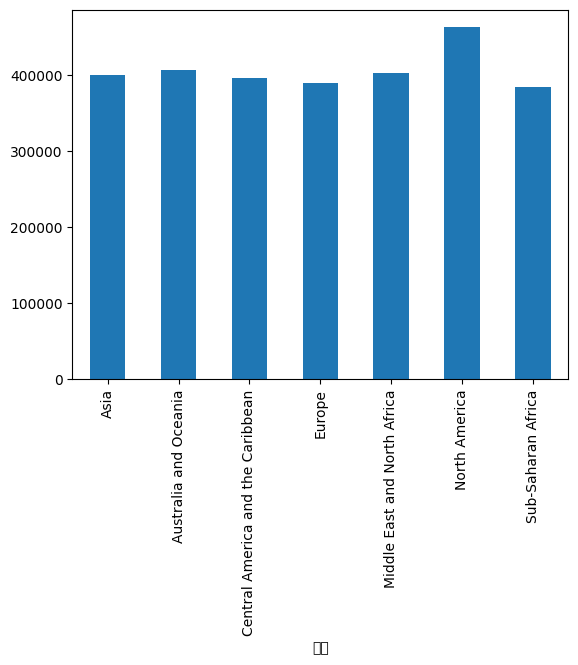

In [8]:
df.groupby('대륙')['총이윤'].mean().plot.bar()

In [ ]:
pd.pivot_table(
    df,
    index ='대륙',
    columns='판매개수',
    values='총이윤',
    aggfunc= 'sum'
).plot.bar()

In [12]:
df['총원가'].diff()

0              NaN
1      -2319746.39
2        558234.70
3       3268605.87
4      -3750035.93
           ...    
9995     242615.35
9996    -125307.17
9997      81515.86
9998    2945483.82
9999   -3139815.30
Name: 총원가, Length: 10000, dtype: float64

In [18]:
cm=pd.read_csv("../csv/num_3/campaign_master.csv")
class_m = pd.read_csv("../csv/num_3/class_master.csv")
customer_m = pd.read_csv("../csv/num_3/customer_master.csv")
use_log = pd.read_csv("../csv/num_3/use_log.csv")

In [19]:
cm.head(1)

,campaign_id,campaign_name
0,CA1,2_일반


In [20]:
class_m.head(1)

,class,class_name,price
0,C01,0_종일,10500


In [22]:
customer_m.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [23]:
use_log.head(1)

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01


In [25]:
data = pd.merge(customer_m,cm, on = 'campaign_id', how='inner')

In [27]:
data = pd.merge(data,class_m, on = 'class', how='inner')

In [29]:
data = pd.merge(data,use_log, on = 'customer_id', how='inner')

In [48]:
# 시계열 데이터로 변경 
# start_date 컬럼의 데이터의 타입을 시계열로 변경
# 2019년1월 1일  이후 데이터만 출력
data['start_date'] = pd.to_datetime(data['start_date'])

In [ ]:
data.sort_values('start_date')

In [ ]:
# 2019년1월 1일  이후 데이터만 출력
data.loc[data['start_date']>='2019-01-01']

1. 이용내역
2. 파생변수 2개 생성
3. weekday 요일 파생변수(use date를 기준으로 요일 생성)
4. 년월 파생변수 하나생성(use date를 기준)
5. 요일별 이용 여부를 계산

In [54]:
data['usedate'] = pd.to_datetime(data['usedate'])

In [59]:
# dt= datetime
data['weekday'] = data['usedate'].dt.weekday
data['년월'] = data['usedate'].dt.strftime("%Y-%m")

In [60]:
data.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,log_id,usedate,weekday,년월
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,2_일반,0_종일,10500,L00000049014216,2018-04-04,2,2018-04
1,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,2_일반,0_종일,10500,L00000049018989,2018-04-13,4,2018-04


In [66]:
use_weekday = data.groupby(['customer_id','년월','weekday'],as_index=False).count()[['customer_id','년월','weekday','log_id']]

use_weekday.rename(columns={"log_id" : "count"},inplace=True)
use_weekday.head(3)

,customer_id,년월,weekday,count
0,AS002855,2018-04,5,4
1,AS002855,2018-05,2,1
2,AS002855,2018-05,5,4


In [69]:
# 각 회월별 가장 많은 count를 가지는 요일을 출력
use_weekday.groupby('customer_id').max()[['weekday','count']]

,weekday,count
customer_id,,
AS002855,6,5
AS008805,6,4
AS009013,0,2
AS009373,6,5
AS015233,6,5
...,...,...
TS995853,6,5
TS998593,6,5
TS999079,6,5


In [73]:
# 함수를 생성
# 인자의 값이 숫자의 형태가 아니면 숫자의 형태가 아니다
# 숫자인 경우 짝수면 짝수 
# 홀수이면 홀수 출력

def func_1(x):
    if type(x) ==float:
        return "인자의 타입은 실수이다"
    elif type(x) !=int:
        return "숫자의 형태가 아니다"
    else:
        if x %2 ==0:
            return "짝수"
        else:
            return "홀수"
        

In [75]:
print(func_1(3))
print(func_1(4))
print(func_1('asd'))
print(func_1(3.2))

홀수
짝수
숫자의 형태가 아니다
인자의 타입은 실수이다


In [76]:
# 함수 생성
# 매개변수 2개
# 두 매개변수 사이의 값들의 합 리턴
# 3,5-> 3+4+5 -> 12리턴
# 두 매개변수의 대소관계는 상관없이 사이의 값들으 ㅣ합

In [79]:
def func_2(x,y):
    result =0
    if x<y :
        for i in range(x,y+1,1):
            result +=i
    else:
        for i in range(y,x+1,1):
            result +=i
    return result


In [80]:
func_2(5,3)

12

In [82]:
def func_3(x,y):
    result =0

    for i in range(min(x,y),max(x,y)+1,1):
        result +=i
    return result

In [83]:
func_3(10,1)

55

In [ ]:
# 함수 생성
# 매개변수 1개
# 인자값이 12345
# 1+2+3+4+5 출력이 되도록 함수를 구성

In [91]:
def func_4(x):
    result = [int(y) for y in str(x)]
    return sum(result)

In [92]:
func_4(12345)

15

In [94]:
def sum_of_digits(num):
    digit_sum = 0
    while num > 0:
        digit_sum += num % 10
        num //= 10
    return digit_sum

In [95]:
sum_of_digits(12345)

15